<a href="https://colab.research.google.com/github/FatemaSamir/Deep-Learning-projects/blob/main/CIFAR_10_With_ConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem : CIFAR-10 With ConvNet
# Auther : Fatema Samir Ahmed

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import keras
from keras.optimizers import adam_v2 as Adam

In [3]:
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [5]:
len(train_labels)

50000

In [6]:
len(test_labels)

10000

In [7]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

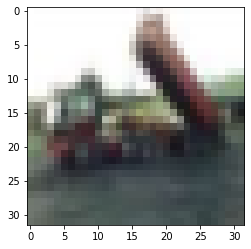

In [8]:
import matplotlib.pyplot as plt
img = train_images[2]
plt.imshow(img)

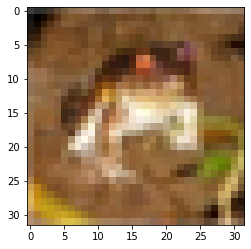

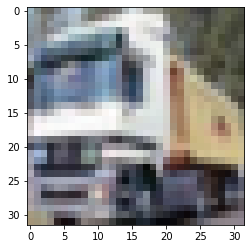

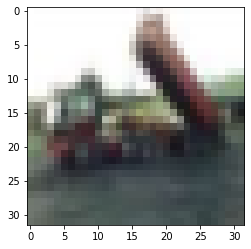

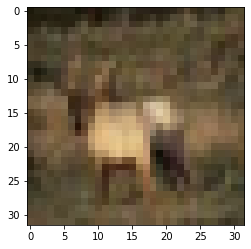

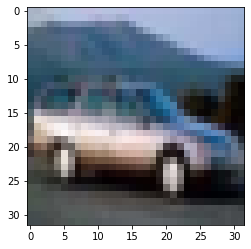

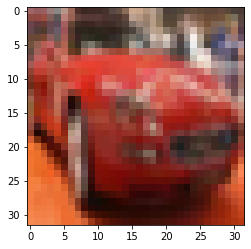

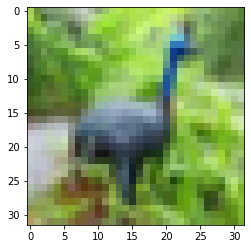

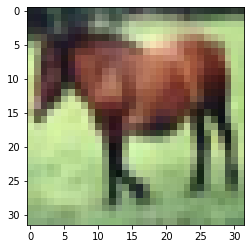

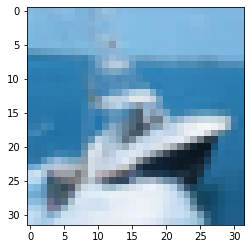

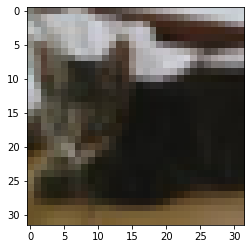

In [13]:
for i in range(10):
    plt.imshow(train_images[i])
    plt.show()

# Visualize 10 examples from each class, in a grid of 20x10 plots

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


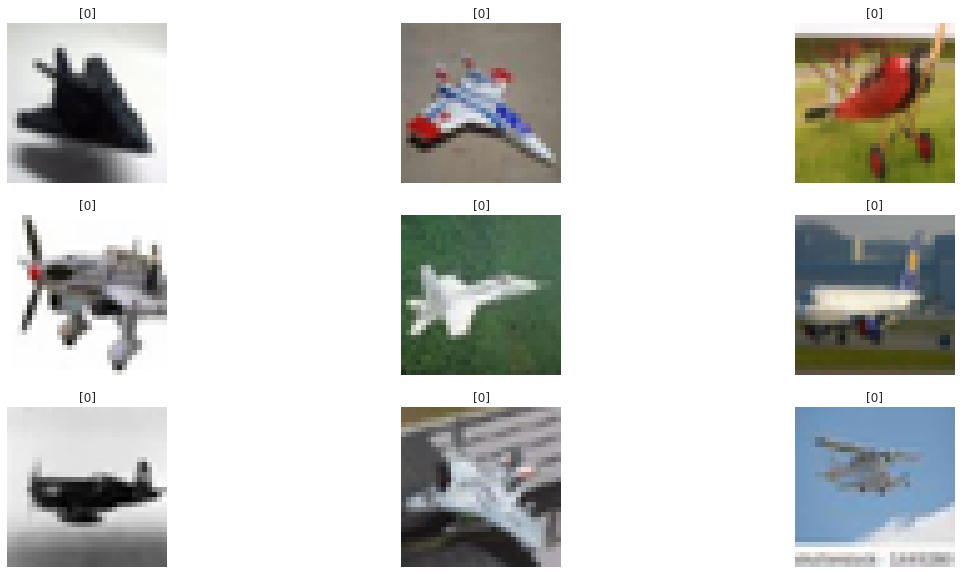

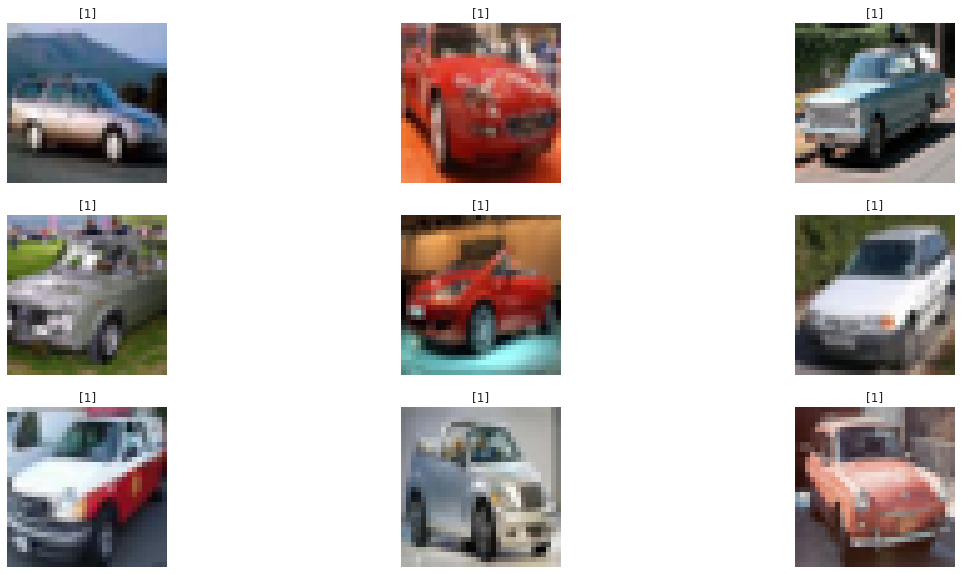

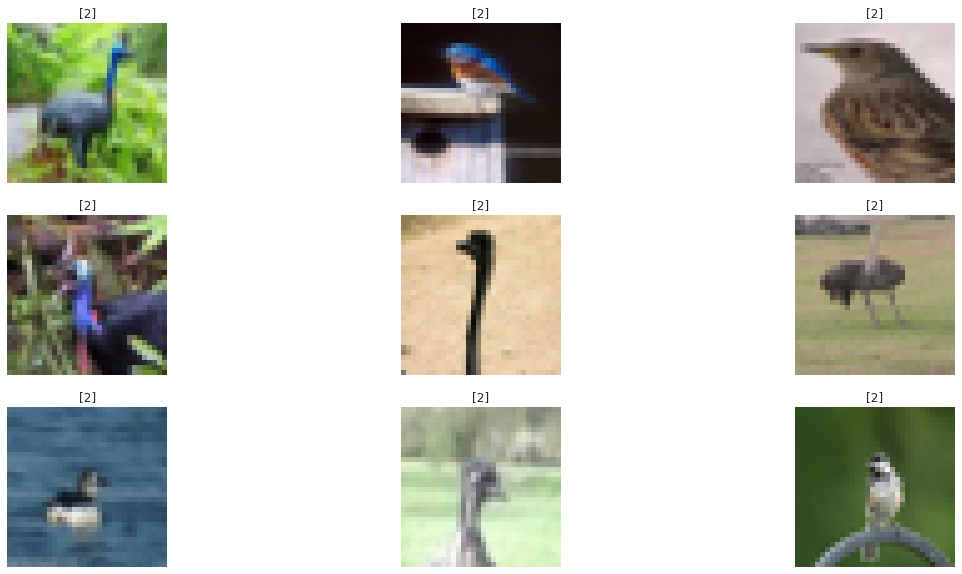

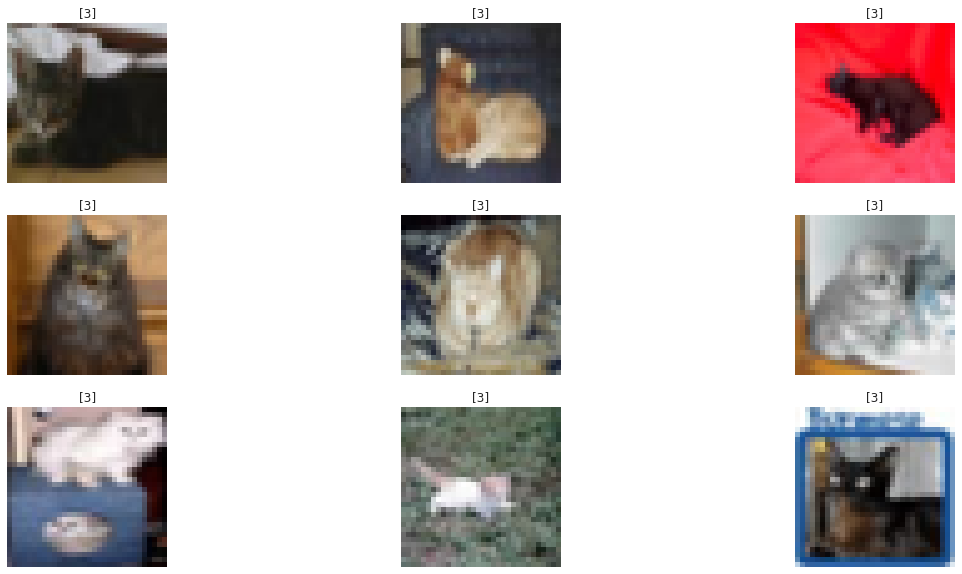

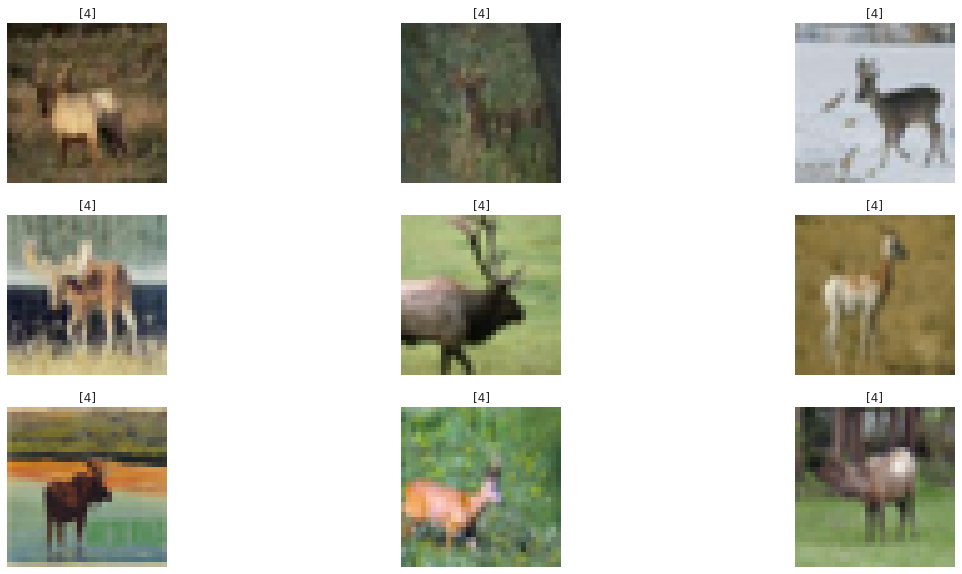

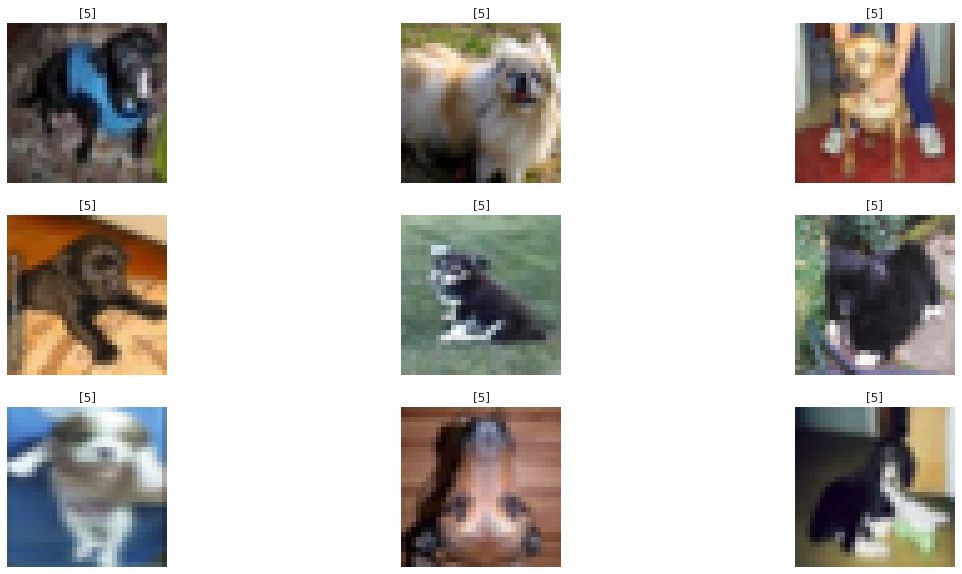

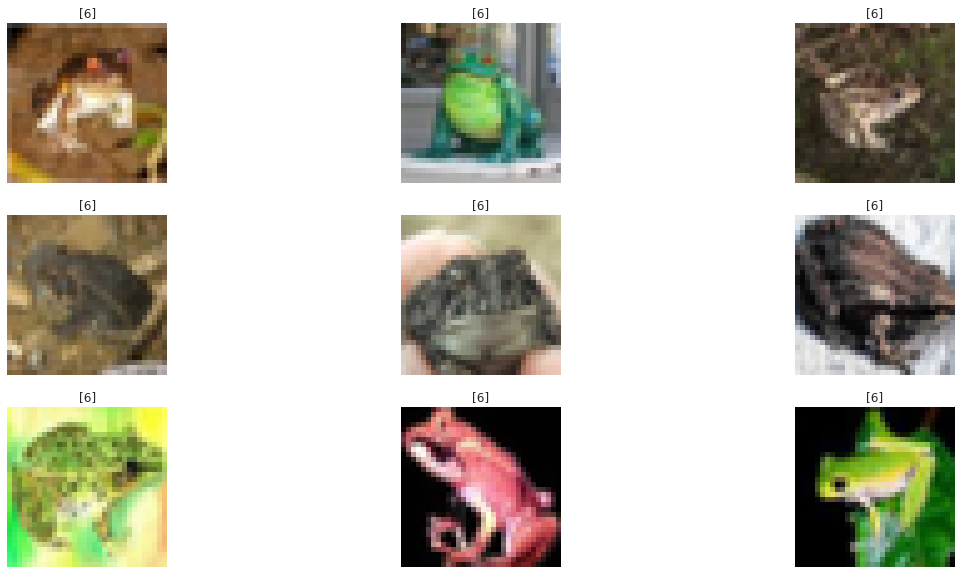

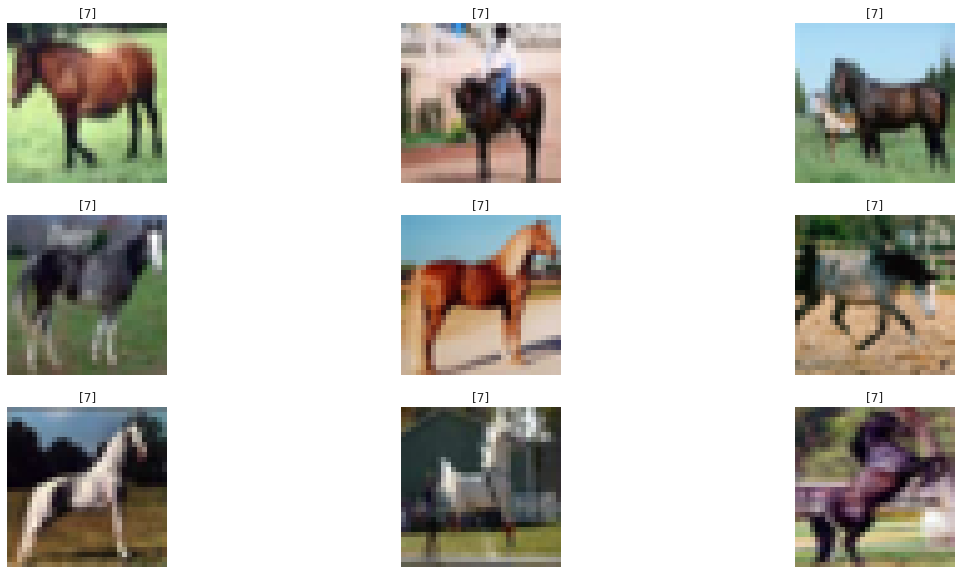

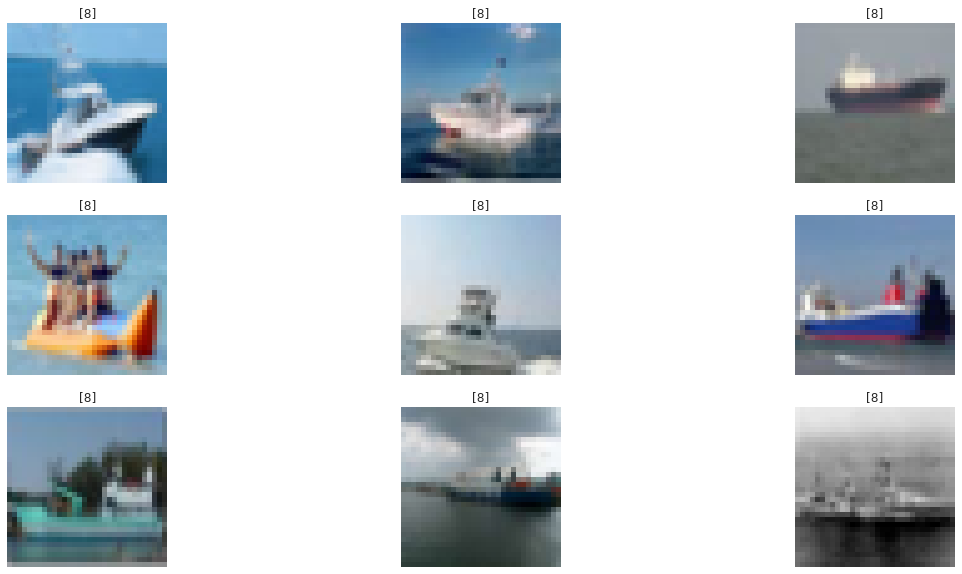

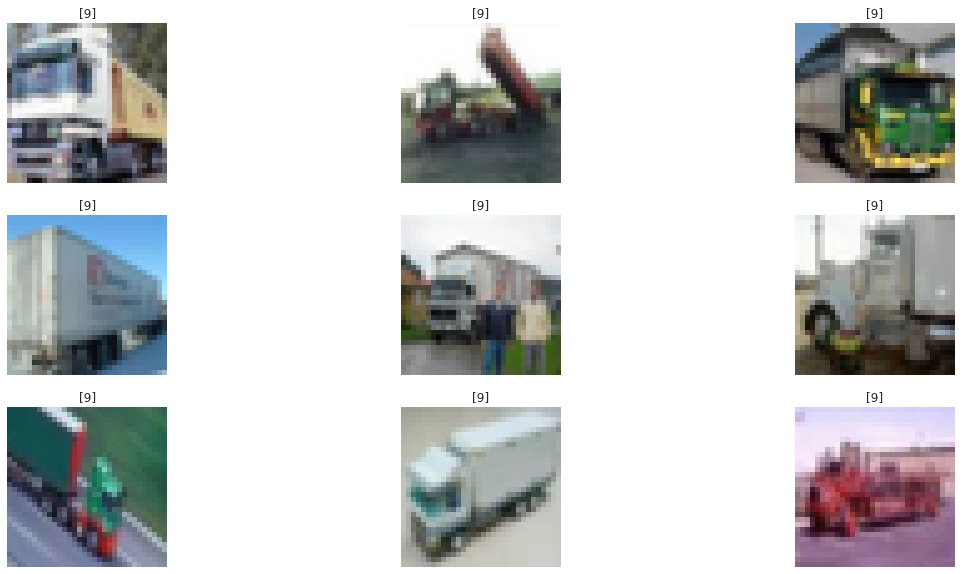

In [48]:
# Visualize 10 examples from each class, in a grid of 20x10 plots
for j in range(10):
  index = np.where(train_labels.reshape(-1) == j)
  X_train = train_images[index]
  Y_train = train_labels[index]
  plt.figure(figsize=(20,10))
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(Y_train[i]) 
    # plt.show()

## Plot a histogram of number of examples per class in the training and test sets

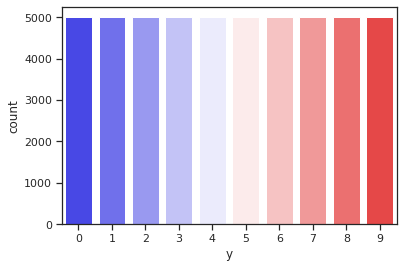

train_labels
0               5000
1               5000
2               5000
3               5000
4               5000
5               5000
6               5000
7               5000
8               5000
9               5000
dtype: int64

In [9]:
sns.set(style="ticks")
f = sns.countplot(x='y', data= pd.DataFrame(train_labels,columns=['y']), palette="bwr")
plt.show()

pd.DataFrame(train_labels,columns=['train_labels']).value_counts() # count values for each class  in Training Data set


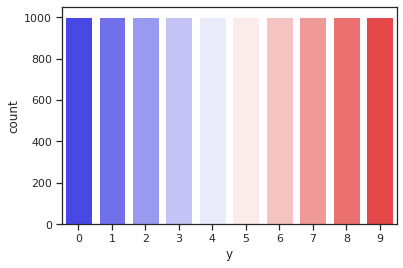

test_labels
0              1000
1              1000
2              1000
3              1000
4              1000
5              1000
6              1000
7              1000
8              1000
9              1000
dtype: int64

In [10]:
sns.set(style="ticks")
f = sns.countplot(x='y', data= pd.DataFrame(test_labels,columns=['y']), palette="bwr")
plt.show()
pd.DataFrame(test_labels,columns=['test_labels']).value_counts() # count values for each class  in Testing Data set

In [4]:
train_images_scaled = train_images.reshape((50000, 32, 32, 3))
train_images_scaled = train_images_scaled.astype('float32') / 255

test_images_scaled = test_images.reshape((10000, 32, 32, 3))
test_images_scaled = test_images_scaled.astype('float32') / 255

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels.shape)
# print(train_labels[0])

(50000, 10)


# Model using CNN

![Conv_basics](https://www.researchgate.net/publication/326963855/figure/fig2/AS:658367580213249@1533978471914/The-sub-convolution-pooling-neural-network.png)

![Conv_dense](https://miro.medium.com/max/2000/0*HWj5PgxWxdcld_ye)

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network 
looks like:

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 128)       147584    
                                                                 
 conv2d_23 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 3, 3, 64)         

In [31]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss='categorical_crossentropy',
                metrics=['accuracy'])

In [32]:
model.fit(train_images_scaled, train_labels, epochs=15, batch_size=128)

Epoch 1/15
391/391 [==============================] - 6s 14ms/step - loss: 1.7203 - accuracy: 0.3621
Epoch 2/15
391/391 [==============================] - 5s 14ms/step - loss: 1.3036 - accuracy: 0.5292
Epoch 3/15
391/391 [==============================] - 5s 14ms/step - loss: 1.1343 - accuracy: 0.5958
Epoch 4/15
391/391 [==============================] - 5s 14ms/step - loss: 1.0325 - accuracy: 0.6355
Epoch 5/15
391/391 [==============================] - 5s 14ms/step - loss: 0.9411 - accuracy: 0.6677
Epoch 6/15
391/391 [==============================] - 5s 14ms/step - loss: 0.8639 - accuracy: 0.6941
Epoch 7/15
391/391 [==============================] - 5s 14ms/step - loss: 0.8058 - accuracy: 0.7153
Epoch 8/15
391/391 [==============================] - 6s 14ms/step - loss: 0.7440 - accuracy: 0.7385
Epoch 9/15
391/391 [==============================] - 5s 14ms/step - loss: 0.6945 - accuracy: 0.7556
Epoch 10/15
391/391 [==============================] - 5s 14ms/step - loss: 0.6468 - accura

In [33]:
test_loss, test_acc = model.evaluate(test_images_scaled, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.8780 - accuracy: 0.7197


In [50]:

model2 = models.Sequential()
model2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32,3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dropout(0.2))
# model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [54]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 4, 4, 64)          73792     
                                                                 
 flatten_9 (Flatten)         (None, 1024)             

In [51]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',
                metrics=['accuracy'])

In [52]:
model2.fit(train_images_scaled, train_labels, epochs=15, batch_size=128)

Epoch 1/15
391/391 [==============================] - 4s 9ms/step - loss: 1.6662 - accuracy: 0.3885
Epoch 2/15
391/391 [==============================] - 4s 9ms/step - loss: 1.3003 - accuracy: 0.5330
Epoch 3/15
391/391 [==============================] - 4s 9ms/step - loss: 1.1307 - accuracy: 0.6011
Epoch 4/15
391/391 [==============================] - 4s 9ms/step - loss: 1.0230 - accuracy: 0.6420
Epoch 5/15
391/391 [==============================] - 4s 9ms/step - loss: 0.9403 - accuracy: 0.6722
Epoch 6/15
391/391 [==============================] - 4s 10ms/step - loss: 0.8755 - accuracy: 0.6920
Epoch 7/15
391/391 [==============================] - 4s 9ms/step - loss: 0.8294 - accuracy: 0.7097
Epoch 8/15
391/391 [==============================] - 4s 9ms/step - loss: 0.7794 - accuracy: 0.7274
Epoch 9/15
391/391 [==============================] - 4s 9ms/step - loss: 0.7473 - accuracy: 0.7374
Epoch 10/15
391/391 [==============================] - 4s 9ms/step - loss: 0.6984 - accuracy: 0.754

In [46]:
test_loss, test_acc = model2.evaluate(test_images_scaled, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.9191 - accuracy: 0.7404


In [114]:
# test_loss, test_acc = model.evaluate(test_images_scaled, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.7949 - accuracy: 0.7438
